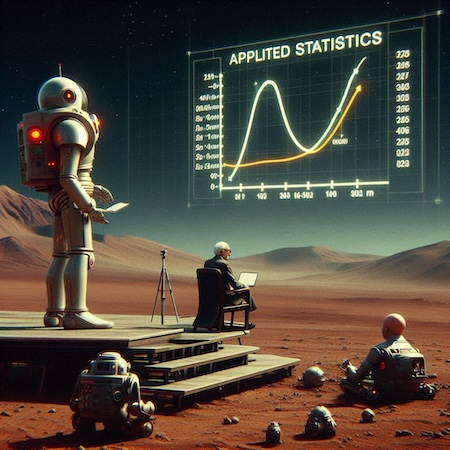

#                                                    Tasks 2024

##                                                          Applied Statistics

###                                                        Due: last commit 20 December 2024
    
    
    
###                                                                                 by Jean-Samuel Bonsenge-Bokanga



### Introduction

For the purpose of the Higher Diploma in Science in Computing in Data Analytics, I am required to submit tasks as part of the Applied Statistics module assessment. The notebook file is called **tasks.ipynb** and will carried out computation operations as per the instructions below, using the Python Programming Language.

## Instructions

Complete all tasks in a notebook called **tasks.ipynb** in your repository.

For each task, you should write your code in code cells while using MarkDown cells to give explanations and insights into your code. Break up your code into smaller, manageable cells whenever possible. Each code cell should focus on a single step in your overall solution.

Include comments in all code cells to tell the reader what each statement does. Write clean, readable, and efficient code, using meaningful variable names and consistent formatting. You should follow Python coding standards and guidelines such as PEP8.

Make regular commits to your repository while completing the tasks. Your commit history should demonstrate how each solution to each task evolved. There should be several commits for each task demonstrating incremental improvements, clarifications, and revisions.

**Task 1: Permutations and Combinations**

Suppose we **alter** the Lady Tasting Tea experiment to involve **twelve** cups of tea. **Six have the milk in first** and the other **six having tea in first**. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.

Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.

Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error.

Would you accept two errors? Explain.

**Task 2: numpy's Normal Distribution**

In this task you will assess whether numpy.random.normal() properly generates normal values. To begin, generate a sample of one hundred thousand values using the function with mean 10.0 and standard deviation 3.0.

Use the scipy.stats.shapiro() function to test whether your sample came from a normal distribution. Explain the results and output.

Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.

**Task 3: t-Test Calculation**

Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.

|**Patient ID**| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |

|**Before** |63 |68 |70 |64 |74 |67 |70 |57 |66 |65 |

|**After** |64 |64 |68 |64 |73 |70 |72 |54 |61 |63 |



Calculate the **t-statistic** based on this data set, using Python. Compare it to the value given by **scipy.stats**. Explain your work and list any sources used.

**Task 4: ANOVA**

In this test we will estimate the probability of committing a type II error in specific circumstances. To begin, create a variable called no_type_ii and set it to 0.

Now use **a loop** to perform the following test **10,000 times.**

Use **numpy.random.normal** to generate three samples with 100 values each. Give each a standard deviation of 0.1. Give the first sample a mean of 4.9, the second a mean of 5.0, and the third a mean of 5.1.

Perform one-way anova on the three samples and add 1 to no_type_ii whenever a type II error occurs.

Summarize and explain your results.

### Task 1: Permutations and Combinations

#### References

GitHub Copilot(2024). Available at: https://github.com/features/copilot (Accessed on 23/11/2024.

Ian MacLouglin (2024) Applied Statistics. Available at: https://github.com/ianmcloughlin/2425_applied_statistics (Accessed on 23/11/2024).

The Python Standard Library » Numeric and Mathematical Modules » math — Mathematical(2024)
math.factorial. Available at: 
https://docs.python.org/3.12/library/math.html#math.factorial (Accessed on 23/11/2024)

The Python Standard Library » Numeric and Mathematical Modules » math — Mathematical(2024)
math.comb(n, k). Available at:
https://docs.python.org/3/library/math.html#math.comb (Accessed on 23/11/2024)

The Python Standard Library » Functional Programming Modules — Functions creating iterators for efficient looping. Available at: https://docs.python.org/3/library/itertools.html#itertools.combinations (Accessed on 23/11/2024)


Ronald Fisher (1935) The Design of Experiments. Available at: https://en.wikipedia.org/wiki/The_Design_of_Experiments (Accessed on 23/11/2024) 

Type I and Type II errors: https://en.wikipedia.org/wiki/Type_I_and_type_II_errors#Table_of_error_types (2024). Accessed on 23/11/2024

Power: https://en.wikipedia.org/wiki/Power_(statistics)#Description (2024). (Accessed on 23/11/2024)

#### Lady Testing Tea.

In [31]:
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html
import random

# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

# Standard plot size.
plt.rcParams['figure.figsize'] = (20, 18)

# Standard colour scheme.
plt.style.use('ggplot')


### Tea Test Design and Background

> <img src="https://upload.wikimedia.org/wikipedia/commons/a/aa/Youngronaldfisher2.JPG" alt="Alt text" style="height:300px;float:right;">
> A lady declares that by tasting a cup of tea made with milk she can discriminate whether the milk or the tea infusion was first added to the cup. We will consider the problem of designing an experiment by means of which this assertion can be tested. For this purpose let us first lay down a simple form of experiment with a view to studying its limitations and its characteristics, both those which appear to be essential to the experimental method, when well developed, and those which are not essential but auxiliary.<br><br>
> Our experiment consists in mixing eight cups of tea, four in one way and four in the other, and presenting them to the subject for judgment in a random order. The subject has been told in advance of what the test will consist, namely that she will be asked to taste eight cups, that these shall be four of each kind, and that they shall be presented to her in a random order, that is in an order not determined arbitrarily by human choice, but by the actual manipulation of the physical apparatus used in games of chance cards, dice, roulettes, etc., or, more expeditiously, from a published collection of random sampling numbers purporting to give the actual results of such manipulation. Her task is to divide the 8 cups into two sets of 4, agreeing, if possible, with the treatments received.<br><br>
> <i>The Design of Experiments By Ronald A. Fisher</i>

## Permutations and Combinations

### Permutations

A permutation is an ordering of its elements.

The set `{a, b, c}` has the permutations `abc`, `acb`, `bac`, `bca`, `cab`, and `cba`.


### Combinations

A combination is a selection of `k` elements from a set of size `n`.

In combinations, order does not matter and the same element cannot be selected twice.

The combinations of size 2 from the set `{a, b, c}` are `{a, b}`, `{a, c}`, and `{b, c}`.

In [5]:
# Number of cups of tea in total.
no_cups = 12

# Number of cups of tea with milk in first.
no_cups_milk_first = 6

# Number of cups of tea with tea in first.
no_cups_tea_first = 6

## math.comb(n, k)

https://docs.python.org/3/library/math.html#math.comb

Calculate the number of ways to choose **k** elements from a set of **n** elements where the order of the chosen elements does not matter and no element is selected more than once.


In [6]:
# Number of ways of selecting four cups from eight.
ways = math.comb(no_cups, no_cups_milk_first)

# Show.
ways

924

Label the twelve cups of tea `1`, `2`, `3`, `4`, `5`, `6`, `7`, `8`, `9`,`10`,`11`,`12`

We select six cups to have milk in first.

For example, we might select `2`, `4`, `5`, `7`, `10`, and `12`.

Visualize having six placeholders where we place six of the cup labels.

How many ways are there to select six cups from twelve?

Cups: `1 2 3 4 5 6 7 8 9 10 11 12`

Placeholders: `_ _ _ _ _ _`


In [7]:
# Total number of ways of selecting six cups from twelve, keeping them in order.
ways_ordered = 12 * 11 * 10 * 9 * 8 * 7 

# Show.
ways_ordered

665280

Note we don't care about order: if cups `2`, `4`, `5`, `7`, `10`, and `12` are selected in order it is the same result as if `2`, `10`, `4`, `5`, `12` and `7` were selected, or any other permutation.

`4 2 10 5 12 7 `

`12 10 7 5 4 2`

`_ _ _ _ _ _`

In [8]:
# No of ways of shuffling four cups.
no_shuffles = 6 *  5 *  4 *  3 *  2 *  1

# Show.
no_shuffles

720

In [9]:
# No of combinations.
no_combs = ways_ordered // no_shuffles

# Show.
no_combs

924

## Formula

In mathematics, the `math.comb()` function is called the *choose* function.

It is written and calculated as

$\binom{n}{k} = \frac{n!}{k!(n-k)!}$.


In [11]:
# Number of cups of tea in total.
n = 12

In [12]:
# Number of cups of tea with milk in first.
k = 6

## math.factorial

https://docs.python.org/3.12/library/math.html#math.factorial

Mathematically denoted as `n!`.

Multiply all positive integers from `n` down to 1.


`n! = n x (n - 1) x (n - 2) x ... x 1`

e.g. `6! = 6 x 5 x 4 x 3 x 2 x 1 = 720`

In [13]:
# Four factorial.
math.factorial(k)

720

In [14]:
# Four factorial.
math.factorial(n - k)

720

In [15]:
# No of ways of selecting k objects from n without replacement and without order.
math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

924

```
n! = 12 x 11 x 10 x 9 x 8 x 7 x 6 x 5 x 4 x 3 x 2 x 1
k! = 6 x 5 x 4 x 3 x 2 x 1
(n - k)! = 6 x 5 x 4 x 3 x 2 x 1
n!/(n - k)! = (12 x 11 x 10 x 9 x 8 x 7 x 6 x 5 x 4 x 3 x 2 x 1) /  (6 x 5 x 4 x 3 x 2 x 1) = 12 x 11 x 10 x 9 x 8 x 7                
```

### Aside

In [16]:
# How many ways are there to shuffle a deck of 52 cards?
math.factorial(52)

80658175170943878571660636856403766975289505440883277824000000000000

## Ordering of Results

https://docs.python.org/3/library/itertools.html#itertools.combinations

In [17]:
# The cup labels.
labels = list(range(no_cups))

# Show.
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [18]:
# Show the different ways of selecting no_cups_milk_first out of no_cups cups of tea.
combs = list(itertools.combinations(labels, no_cups_milk_first))

# Show.
combs

[(0, 1, 2, 3, 4, 5),
 (0, 1, 2, 3, 4, 6),
 (0, 1, 2, 3, 4, 7),
 (0, 1, 2, 3, 4, 8),
 (0, 1, 2, 3, 4, 9),
 (0, 1, 2, 3, 4, 10),
 (0, 1, 2, 3, 4, 11),
 (0, 1, 2, 3, 5, 6),
 (0, 1, 2, 3, 5, 7),
 (0, 1, 2, 3, 5, 8),
 (0, 1, 2, 3, 5, 9),
 (0, 1, 2, 3, 5, 10),
 (0, 1, 2, 3, 5, 11),
 (0, 1, 2, 3, 6, 7),
 (0, 1, 2, 3, 6, 8),
 (0, 1, 2, 3, 6, 9),
 (0, 1, 2, 3, 6, 10),
 (0, 1, 2, 3, 6, 11),
 (0, 1, 2, 3, 7, 8),
 (0, 1, 2, 3, 7, 9),
 (0, 1, 2, 3, 7, 10),
 (0, 1, 2, 3, 7, 11),
 (0, 1, 2, 3, 8, 9),
 (0, 1, 2, 3, 8, 10),
 (0, 1, 2, 3, 8, 11),
 (0, 1, 2, 3, 9, 10),
 (0, 1, 2, 3, 9, 11),
 (0, 1, 2, 3, 10, 11),
 (0, 1, 2, 4, 5, 6),
 (0, 1, 2, 4, 5, 7),
 (0, 1, 2, 4, 5, 8),
 (0, 1, 2, 4, 5, 9),
 (0, 1, 2, 4, 5, 10),
 (0, 1, 2, 4, 5, 11),
 (0, 1, 2, 4, 6, 7),
 (0, 1, 2, 4, 6, 8),
 (0, 1, 2, 4, 6, 9),
 (0, 1, 2, 4, 6, 10),
 (0, 1, 2, 4, 6, 11),
 (0, 1, 2, 4, 7, 8),
 (0, 1, 2, 4, 7, 9),
 (0, 1, 2, 4, 7, 10),
 (0, 1, 2, 4, 7, 11),
 (0, 1, 2, 4, 8, 9),
 (0, 1, 2, 4, 8, 10),
 (0, 1, 2, 4, 8, 11),
 (0, 1, 2, 4

In [19]:
# Number of combinations.
len(combs)

924

In [20]:
# Select four cups at random to put milk in first.
# https://docs.python.org/3/library/random.html#random.sample
labels_milk = random.sample(labels, 6)

# Sort, inplace.
labels_milk.sort()

# Show.
labels_milk

[1, 2, 4, 6, 10, 11]

In [21]:
# Turn labels_milk into a set.
# Uses: https://docs.python.org/3/tutorial/datastructures.html#sets
set(labels_milk)

{1, 2, 4, 6, 10, 11}

In [22]:
# Calculate the overlap between each element of combs and labels_milk.

no_overlaps = []

for comb in combs:
  # Turn comb into a set.
  s1 = set(comb)
  # Turn labels_milk into a set.
  s2 = set(labels_milk)
  # Figure out where they overlap.
  overlap = s1.intersection(s2)
  # Show the combination and the overlap.
  print(comb, overlap, len(overlap))
  # Append overlap to no_overlaps.
  no_overlaps.append(len(overlap))

(0, 1, 2, 3, 4, 5) {1, 2, 4} 3
(0, 1, 2, 3, 4, 6) {1, 2, 4, 6} 4
(0, 1, 2, 3, 4, 7) {1, 2, 4} 3
(0, 1, 2, 3, 4, 8) {1, 2, 4} 3
(0, 1, 2, 3, 4, 9) {1, 2, 4} 3
(0, 1, 2, 3, 4, 10) {1, 2, 10, 4} 4
(0, 1, 2, 3, 4, 11) {1, 2, 11, 4} 4
(0, 1, 2, 3, 5, 6) {1, 2, 6} 3
(0, 1, 2, 3, 5, 7) {1, 2} 2
(0, 1, 2, 3, 5, 8) {1, 2} 2
(0, 1, 2, 3, 5, 9) {1, 2} 2
(0, 1, 2, 3, 5, 10) {1, 2, 10} 3
(0, 1, 2, 3, 5, 11) {1, 2, 11} 3
(0, 1, 2, 3, 6, 7) {1, 2, 6} 3
(0, 1, 2, 3, 6, 8) {1, 2, 6} 3
(0, 1, 2, 3, 6, 9) {1, 2, 6} 3
(0, 1, 2, 3, 6, 10) {1, 2, 10, 6} 4
(0, 1, 2, 3, 6, 11) {1, 2, 11, 6} 4
(0, 1, 2, 3, 7, 8) {1, 2} 2
(0, 1, 2, 3, 7, 9) {1, 2} 2
(0, 1, 2, 3, 7, 10) {1, 2, 10} 3
(0, 1, 2, 3, 7, 11) {1, 2, 11} 3
(0, 1, 2, 3, 8, 9) {1, 2} 2
(0, 1, 2, 3, 8, 10) {1, 2, 10} 3
(0, 1, 2, 3, 8, 11) {1, 2, 11} 3
(0, 1, 2, 3, 9, 10) {1, 2, 10} 3
(0, 1, 2, 3, 9, 11) {1, 2, 11} 3
(0, 1, 2, 3, 10, 11) {11, 1, 2, 10} 4
(0, 1, 2, 4, 5, 6) {1, 2, 4, 6} 4
(0, 1, 2, 4, 5, 7) {1, 2, 4} 3
(0, 1, 2, 4, 5, 8) {1, 2, 4} 3
(0, 1, 2

(0, 4, 7, 9, 10, 11) {10, 11, 4} 3
(0, 4, 8, 9, 10, 11) {10, 11, 4} 3
(0, 5, 6, 7, 8, 9) {6} 1
(0, 5, 6, 7, 8, 10) {10, 6} 2
(0, 5, 6, 7, 8, 11) {11, 6} 2
(0, 5, 6, 7, 9, 10) {10, 6} 2
(0, 5, 6, 7, 9, 11) {11, 6} 2
(0, 5, 6, 7, 10, 11) {10, 11, 6} 3
(0, 5, 6, 8, 9, 10) {10, 6} 2
(0, 5, 6, 8, 9, 11) {11, 6} 2
(0, 5, 6, 8, 10, 11) {10, 11, 6} 3
(0, 5, 6, 9, 10, 11) {10, 11, 6} 3
(0, 5, 7, 8, 9, 10) {10} 1
(0, 5, 7, 8, 9, 11) {11} 1
(0, 5, 7, 8, 10, 11) {10, 11} 2
(0, 5, 7, 9, 10, 11) {10, 11} 2
(0, 5, 8, 9, 10, 11) {10, 11} 2
(0, 6, 7, 8, 9, 10) {10, 6} 2
(0, 6, 7, 8, 9, 11) {11, 6} 2
(0, 6, 7, 8, 10, 11) {10, 11, 6} 3
(0, 6, 7, 9, 10, 11) {10, 11, 6} 3
(0, 6, 8, 9, 10, 11) {10, 11, 6} 3
(0, 7, 8, 9, 10, 11) {10, 11} 2
(1, 2, 3, 4, 5, 6) {1, 2, 4, 6} 4
(1, 2, 3, 4, 5, 7) {1, 2, 4} 3
(1, 2, 3, 4, 5, 8) {1, 2, 4} 3
(1, 2, 3, 4, 5, 9) {1, 2, 4} 3
(1, 2, 3, 4, 5, 10) {1, 2, 10, 4} 4
(1, 2, 3, 4, 5, 11) {1, 2, 11, 4} 4
(1, 2, 3, 4, 6, 7) {1, 2, 4, 6} 4
(1, 2, 3, 4, 6, 8) {1, 2, 4, 6} 4
(1, 2,

(2, 3, 6, 7, 9, 10) {2, 10, 6} 3
(2, 3, 6, 7, 9, 11) {2, 11, 6} 3
(2, 3, 6, 7, 10, 11) {11, 2, 10, 6} 4
(2, 3, 6, 8, 9, 10) {2, 10, 6} 3
(2, 3, 6, 8, 9, 11) {2, 11, 6} 3
(2, 3, 6, 8, 10, 11) {11, 2, 10, 6} 4
(2, 3, 6, 9, 10, 11) {11, 2, 10, 6} 4
(2, 3, 7, 8, 9, 10) {2, 10} 2
(2, 3, 7, 8, 9, 11) {2, 11} 2
(2, 3, 7, 8, 10, 11) {11, 2, 10} 3
(2, 3, 7, 9, 10, 11) {11, 2, 10} 3
(2, 3, 8, 9, 10, 11) {11, 2, 10} 3
(2, 4, 5, 6, 7, 8) {2, 4, 6} 3
(2, 4, 5, 6, 7, 9) {2, 4, 6} 3
(2, 4, 5, 6, 7, 10) {2, 10, 4, 6} 4
(2, 4, 5, 6, 7, 11) {2, 11, 4, 6} 4
(2, 4, 5, 6, 8, 9) {2, 4, 6} 3
(2, 4, 5, 6, 8, 10) {2, 10, 4, 6} 4
(2, 4, 5, 6, 8, 11) {2, 11, 4, 6} 4
(2, 4, 5, 6, 9, 10) {2, 10, 4, 6} 4
(2, 4, 5, 6, 9, 11) {2, 11, 4, 6} 4
(2, 4, 5, 6, 10, 11) {2, 4, 6, 10, 11} 5
(2, 4, 5, 7, 8, 9) {2, 4} 2
(2, 4, 5, 7, 8, 10) {2, 10, 4} 3
(2, 4, 5, 7, 8, 11) {2, 11, 4} 3
(2, 4, 5, 7, 9, 10) {2, 10, 4} 3
(2, 4, 5, 7, 9, 11) {2, 11, 4} 3
(2, 4, 5, 7, 10, 11) {11, 2, 10, 4} 4
(2, 4, 5, 8, 9, 10) {2, 10, 4} 3
(2, 4, 5

In [23]:
# Show the overlaps.
print(no_overlaps)

[3, 4, 3, 3, 3, 4, 4, 3, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 2, 2, 3, 3, 2, 3, 3, 3, 3, 4, 4, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 3, 3, 4, 4, 3, 4, 4, 4, 4, 5, 3, 3, 3, 4, 4, 2, 2, 3, 3, 2, 3, 3, 3, 3, 4, 3, 3, 4, 4, 3, 4, 4, 4, 4, 5, 2, 3, 3, 3, 3, 4, 3, 3, 4, 4, 3, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 2, 2, 3, 3, 2, 3, 3, 3, 3, 4, 2, 2, 2, 3, 3, 1, 1, 2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 4, 1, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 4, 4, 2, 2, 3, 3, 2, 3, 3, 3, 3, 4, 3, 3, 4, 4, 3, 4, 4, 4, 4, 5, 2, 3, 3, 3, 3, 4, 3, 3, 4, 4, 2, 2, 3, 3, 2, 3, 3, 3, 3, 4, 1, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 4, 3, 3, 4, 4, 2, 2, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 2, 2, 3, 3, 2, 3, 3, 3, 3, 4, 2, 2, 2, 3, 3, 1, 1, 2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 4, 1, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 4, 4, 2, 2, 3, 3, 2, 3, 3, 3, 3, 4, 3, 3, 4, 4, 3, 4, 4, 4, 4, 5, 2, 3, 3, 3, 3, 4, 3, 3, 4, 4, 2, 2, 3, 3, 2, 3, 3, 3, 3, 4, 1, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 4, 3, 3, 4, 4, 2, 2, 

In [24]:
# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Show.
counts

(array([0, 1, 2, 3, 4, 5, 6]),
 array([  1,  36, 225, 400, 225,  36,   1], dtype=int64))

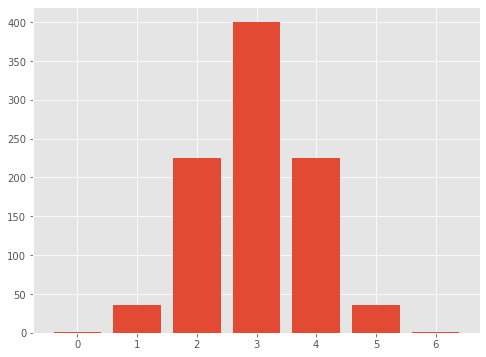

In [36]:
# Create a figure.
fig, ax = plt.subplots(figsize=(8, 6))

# Bar chart.
ax.bar(counts[0], counts[1]);

## The Null Hypothesis

- The lady has no special power to tell the difference between cups of tea with milk in first and cups of tea with tea in first.

- The lady is selecting the six cups from the twelve cups at random.

## Alternative Hypothesis

- The lady can tell the difference. 

### Evidence

Fisher: if the lady is just picking six cups at random, then it is unlikely she will pick the correct six. The probability is one in one hundred and ten. It is so unlikely, that I will agree that something non-random is happening when she is selecting the cups of tea. 

In [26]:
# The probability that she (randomly) selects the six correct cups.
1 / 110

0.00909090909090909

In [27]:
# The probability that she (randomly) selects at least five correct cups.
(24 + 1) / 110

0.22727272727272727

## Type I Errors, Type II Errors, and Power

- Type I and Type II errors: https://en.wikipedia.org/wiki/Type_I_and_type_II_errors#Table_of_error_types
 - Power: https://en.wikipedia.org/wiki/Power_(statistics)#Description

### False negatives and false positives are significant issues in Lady Tea testing.

**Null Hypothesis (HO)**: "The Lady has no special power to tell the difference between cups of tea with milk first and cups of without tea in first".

**Hypothesis**: "The Lady can tell the difference".

**Type I error (false positive)**: The true fact is that The Lady has no special power to tell the difference between cups of tea with milk first and cups of without tea in first; but the Statistician believes in her capabilities to distinguish both cups of tea with and without milk in first, as she argued.

**Type II error (false negative)**: The true fact is that the Lady can tell the difference between both cups of tea, but as the Lady is randomly picking the cups, this way of picking cups of tea, leads the Statistician to conclude that the Lady is not capable of telling the difference. Hence the rate of probability is underrated or less probable.

Type I and Type II errors: https://en.wikipedia.org/wiki/Type_I_and_type_II_errors#Table_of_error_types

 Power: https://en.wikipedia.org/wiki/Power_(statistics)#Description

##### Note
This notebook was created with the help of [GitHub Copilot](https://github.com/features/copilot) and Applied Statistics Lecture Note provided by the Lecturer Ian McLoughlin avaialable at: https://github.com/ianmcloughlin/2425_applied_statistics (Accessed on 23/11/2024).


### Task 2: numpy's Normal Distribution

### Task 3: t-Test Calculation


### Task 4: ANOVA

# End.